In [61]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Load Flower dtaset

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

In [ ]:
image_coount = len(list(data_dir.glob('*/*.jpg')))
print(image_coount)

In [ ]:
roses =list(data_dir.glob('roses/*'))
roses[:10]

In [ ]:
PIL.Image.open(roses[5])

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[1])

### Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict = {
    "roses" : list(data_dir.glob('roses/*')),
    "daisy" : list(data_dir.glob('daisy/*')),
    "dandelion" : list(data_dir.glob('dandelion/*')),
    "sunflowers" : list(data_dir.glob('sunflowers/*')),
    "tulips" : list(data_dir.glob('tulips/*'))
}

In [ ]:
PIL.Image.open(flowers_images_dict['roses'][0])

In [ ]:
# Create a lable dictionary
flowers_labels_dict = {
        'roses': 0,
        'daisy': 1,
        'dandelion': 2,
        'sunflowers': 3,
        'tulips': 4,
}

In [ ]:
rosesImg = cv2.imread(str(flowers_images_dict['dandelion'][1]))
rosesImg.shape

In [ ]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img, (180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
# convert to numpy array from list
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Scale images

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

# Build convolutionary nural network and train it

In [65]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
    
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 28s 318ms/step - loss: 1.5652 - accuracy: 0.3623
Epoch 2/10
86/86 [==============================] - 27s 316ms/step - loss: 1.0536 - accuracy: 0.5836
Epoch 3/10
86/86 [==============================] - 27s 316ms/step - loss: 0.9042 - accuracy: 0.6479
Epoch 4/10
86/86 [==============================] - 28s 322ms/step - loss: 0.7035 - accuracy: 0.7347
Epoch 5/10
86/86 [==============================] - 27s 320ms/step - loss: 0.4670 - accuracy: 0.8365
Epoch 6/10
86/86 [==============================] - 28s 321ms/step - loss: 0.3227 - accuracy: 0.8874
Epoch 7/10
86/86 [==============================] - 28s 329ms/step - loss: 0.1551 - accuracy: 0.9549
Epoch 8/10
86/86 [==============================] - 31s 361ms/step - loss: 0.1164 - accuracy: 0.9698
Epoch 9/10
86/86 [==============================] - 32s 372ms/step - loss: 0.0787 - accuracy: 0.9789
Epoch 10/10
86/86 [==============================] - 34s 397ms/step - loss: 0.0406 - accura

In [67]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 85ms/step - loss: 2.1756 - accuracy: 0.6068


[2.175565004348755, 0.6067538261413574]

### Training accuracy is 99% but evaluation is 60% accuracy, there is overfitting 

In [69]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 78ms/step


array([[ 0.44895408,  9.906567  ,  4.359627  , -7.589587  , -4.590677  ],
       [ 8.194825  ,  1.8883896 , -5.844772  , -3.7739768 ,  2.3983057 ],
       [-0.60126   , -2.9854052 , 15.5861225 , -0.6414376 , -0.94033825],
       ...,
       [-3.9849367 ,  0.61424977,  2.9834046 ,  2.0862944 ,  1.9024011 ],
       [ 3.2659657 , -1.4092044 , -1.717965  , -1.1275207 ,  2.6479046 ],
       [-3.093407  , -2.2752297 ,  1.923171  , 15.165694  , -0.83985555]],
      dtype=float32)

# Improve Test Accuracy Using Data Augmentation

In [126]:
data_augmentation_t = keras.Sequential([
    # layers.RandomFlip(mode='horizontal_and_vertical', seed=3)
    # layers.RandomRotation(0.3,fill_mode='reflect', interpolation='bilinear', seed=None, fill_value=0.0,)
    layers.RandomZoom(0.9, 0.2)
])

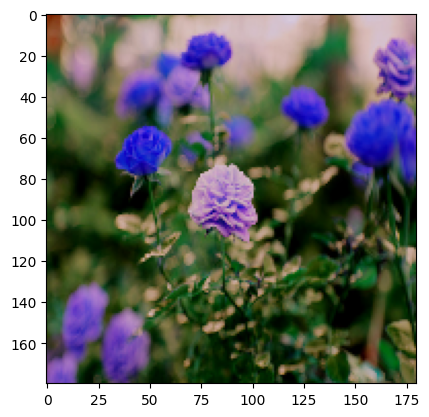

In [101]:
plt.imshow(X[1])

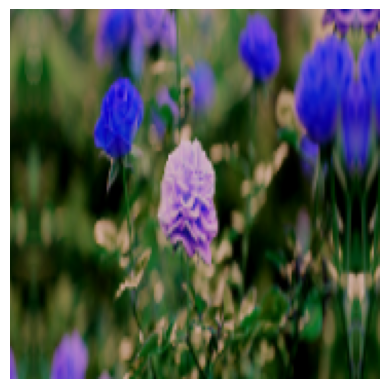

In [135]:
plt.axis('off')
plt.imshow(data_augmentation_t(X)[1].numpy().astype("uint8"))

In [137]:
data_augmentation = keras.Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical', seed=3),
    layers.RandomRotation(0.3,fill_mode='reflect', interpolation='bilinear', seed=None, fill_value=0.0,),
    layers.RandomZoom(0.9, 0.2)
])

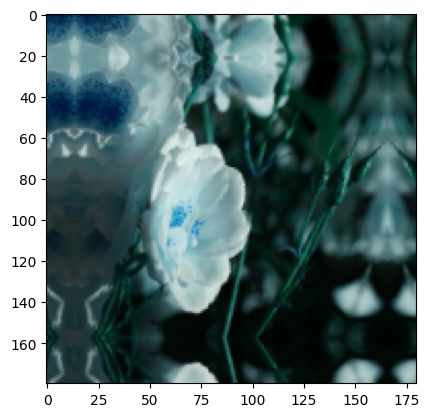

In [142]:
plt.imshow(data_augmentation(X)[8].numpy().astype("uint8"))

# Train model with data augmentation and dropout layer

In [154]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding='same', activation='relu'), # 18 -> no. of filter, 3-> size of 3X3
    layers.MaxPooling2D(),                
    layers.Conv2D(32,3, padding='same', activation='relu'), # 32 -> no. of filter, 3-> size of 3X3
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'), # 64 -> no. of filter, 3-> size of 3X3
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),     # Flatten to singel dimentional array
    layers.Dense(128, activation='relu'), # 128 -> 
    layers.Dense(num_classes)                  
    ])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 36s 401ms/step - loss: 1.3338 - accuracy: 0.4201
Epoch 2/30
86/86 [==============================] - 35s 408ms/step - loss: 1.1036 - accuracy: 0.5527
Epoch 3/30
86/86 [==============================] - 34s 392ms/step - loss: 1.0449 - accuracy: 0.5719
Epoch 4/30
86/86 [==============================] - 34s 391ms/step - loss: 0.9464 - accuracy: 0.6301
Epoch 5/30
86/86 [==============================] - 35s 404ms/step - loss: 0.9125 - accuracy: 0.6472
Epoch 6/30
86/86 [==============================] - 33s 388ms/step - loss: 0.8690 - accuracy: 0.6610
Epoch 7/30
86/86 [==============================] - 35s 410ms/step - loss: 0.8554 - accuracy: 0.6632
Epoch 8/30
86/86 [==============================] - 34s 395ms/step - loss: 0.8171 - accuracy: 0.6799
Epoch 9/30
86/86 [==============================] - 34s 397ms/step - loss: 0.8259 - accuracy: 0.6795
Epoch 10/30
86/86 [==============================] - 34s 396ms/step - loss: 0.7793 - accura

In [155]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 83ms/step - loss: 0.7146 - accuracy: 0.7298


[0.7146123647689819, 0.7298474907875061]